#8장 합성곱 신경망
합성곱 신경망은 이미지 처리에 뛰어난 성능을 보이기 때문에 이미지 분류 문제를 다루는데에 많이 쓰임

### 합성곱 연산

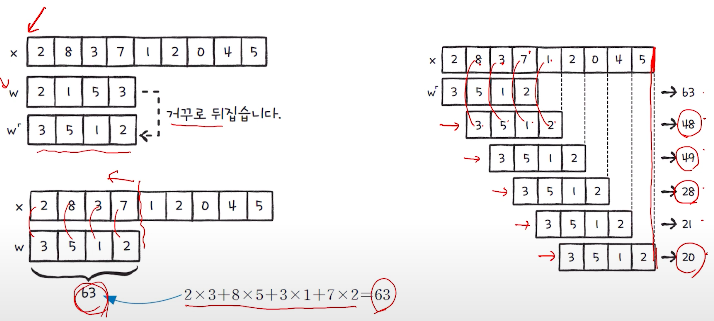

1차원 배열x에 w(가중치)를 거꾸로 뒤집어서 곱함

w의 길이가 4이기 때문에 x배열의 4원소까지만 곱하는데, 점곱연산과 동일함

다음 단계는 w배열을 한칸 옆으로 이동해서 똑같은 것을 반복함

이것을 x의 마지막 원소가 w의 마지막 원소와 곱해질때까지 반복

연산은 총 6번 일어나게 됨 ->합성곱 연산.

합성곱 신경망에서는 합성곱 연산이 아닌 교차 상관이 일어나는데, 관례적으로 합성곱 신경망이라고 부름

### 교차 상관 연산

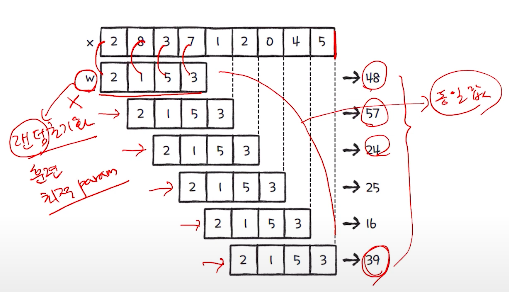

합성곱 연산과 다른 것은 w배열을 뒤집지 않고 그대로 두고 연산을 함

교차 상관 연산을 사용하는 이유는 신경망에서의 w는 랜덤하게 초기화 하는데, 훈련에서 최적의 파라미터로 수정해나가게 됨

이를 뒤집나, 안뒤집고 쓰나 어차피 랜덤하기 때문에 굳이 뒤집어서 연산하지 않고 그대로 둔다

### 밸리드 패딩

보통 배열의 앞 뒤에 0을 붙이는 것을 패딩이라 하는데, 밸리드 패딩은 원소를 붙이지 않고 그냥 원본 입력 배열에 w를 그대로 적용하는 것. 

이 단점은 x의 첫 원소는 w와 1번만 연산되고, 4번째 원소는 4번 연산에 참여함. 입력 원소별로 기여도가 달라지게 됨 -> 입력 데이터의 어떠한 특성은 좀 불리할 수 있음


### 풀패딩
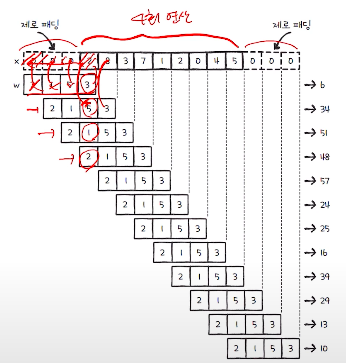

각 입력 원소가 모두 다 동일한 횟수만큼 연산되도록 패딩을 주는 것

x배열의 앞, 뒤에 0을 3개씩 두면 (제로패딩)

### 세임 패딩
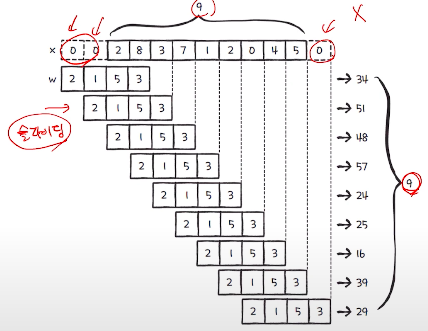

입력데이터의 원소가 9개인데, 출력데이터의 원소도 9개가 되도록 맞추는 것

앞이나 뒤에 적당하게 0원소를 더 붙여서 w의 이동(슬라이딩) 횟수를 더 주어서 출력되는 원소의 개수가 입력의 원소 개수와 같게 해주는 것

합성곱 연산에서 즐겨 사용하는 방법이고, 출력 결과가 입력과 사이즈가 동일

0원소를 앞 뒤에 몇개 붙일지는 계산 필요 없이 패키지에서 계산해줌


### 스트라이드
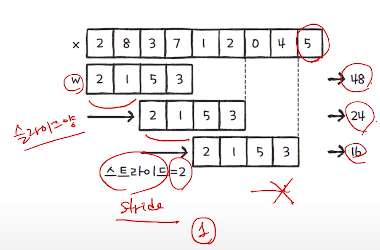

w가중치가 한 칸씩이 아닌 여러 칸씩 이동하게 하는 것

스트라이드 : 이동하는 슬라이드 양 (스트라이드=2, 스트라이드=1 지정)

두 칸씩 이동하면 출력값도 3개 나오게 됨 (그림에서 x배열의 마지막 원소 5가 연산되지 않았지만 두칸 씩 이동하기 때문에 진행하지 못하고 끝남)

스트라이드는 대부분 1이고 간혹 2를 사용할 때가 있다

### 2차원 배열의 합성곱

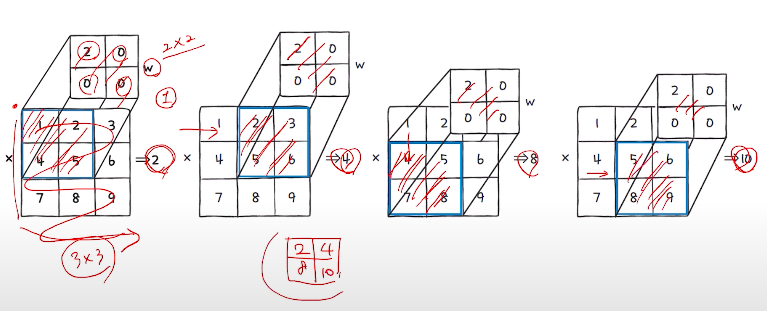
대부분의 합성곱 연산은 2차원 데이터에 하는 경우가 많음 (높이 * 너비 사각형 형태)


### 2차원 배열의 세임 패딩
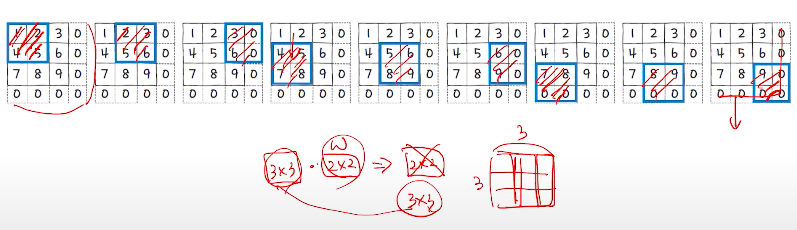

위의 2차원 배열의 합성곱에서는 3x3인 x에 2x2사이즈의 가중치 w를 곱해 2x2의 결과를 얻었음

3x3 사이즈의 결과를 얻고 싶으면 세임 패딩을 사용

예시에서는 오른쪽, 아래에 0 원소를 추가해 가중치가 오른쪽으로 세번씩 이동하면서 연산, 아래로도 세번 이동해 총 9번의 연산 후 3x3 사이즈의 결과값을 얻어냄

### 2차원 배열의 스트라이드
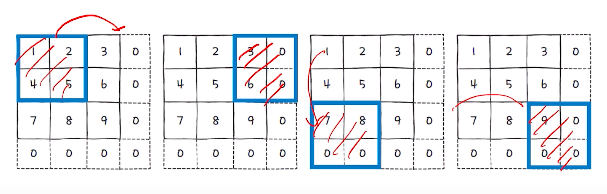
첫 연산 후 두 칸을 건너뛴 후 곱하는 형태


### 이미지 데이터와 커널
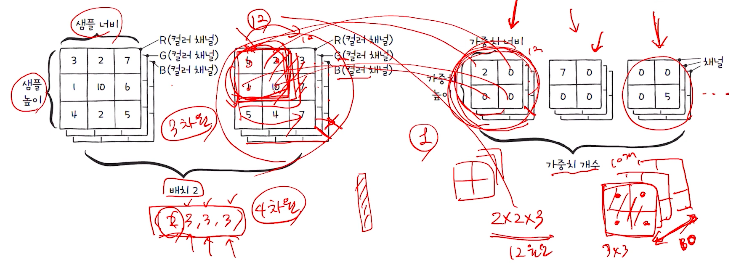
실제 이미지 데이터는 rgb 값이 있음. 샘플 높이 x 너비 에 r,g,b 까지 (3,3,3) 3차원이 됨

그리고 배치 데이터를 사용하기 때문에 배치 차원이 앞에 와서 4차원 데이터가 됨

입력데이터가 3차원이면 가중치도 3차원이 됨 (가중치의 깊이는 입력데이터의 채널 깊이와 같음)

### 이미지 데이터의 합성곱 연산
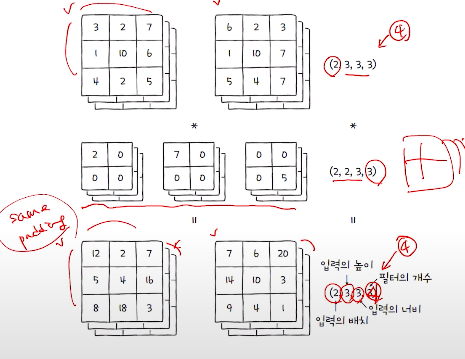
배치 2개의샘플, 높이 너비 3x3, 깊이 (rgb) 3 컬러 이미지 데이터

가중치 크기 2x2, 깊이 3, 개수 3

이 두가지를 곱하면(세임 패딩 사용) 결과 (2,3,3,3) 배치(샘플개수), 높이, 너비, 필터 개수


### 풀링
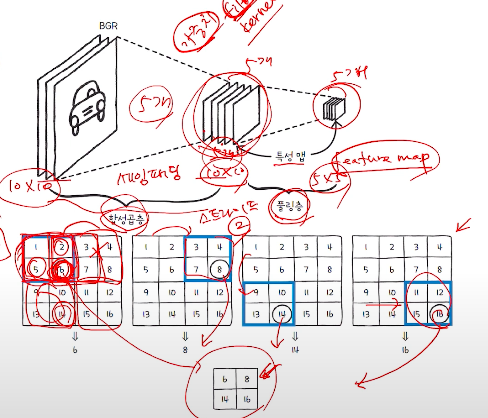
풀링 : 2차원 데이터의 세로, 가로 방향의 공간을 줄이는 연산

일반적으로 합성곱은 세임패딩을 사용해 결과값을 얻고, 풀링층에서 사이즈를 절반으로 줄임

풀링층은 최대값이나 평균값을 구하는 간단한 연산을 함 스트라이드 = 2 보통 최대 풀링 사용

풀링은 보통 2x2사이즈를 사용함 

특성맵에서 풀링을 통해 가장 활성화가 크게 된 원소를 골라내는 것 (높이, 너비 줄어들고 깊이는 안줄어듦)


### 합성곱 층, 풀링 층
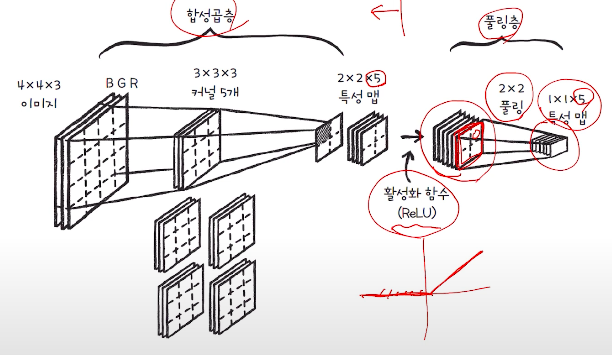
4x4, 깊이 3 인 입력데이터

3x3, 깊이 3 인 커널(필터,가중치) 5개 사용 합성곱의 전형적 크기는 3x3 많이 사용함

-> 2x2, 깊이 5인 특성 맵이 만들어짐

합성곱층과 풀링층 사이에 활성화 함수를 사용하는제 ReLU 함수를 주로 사용함 (음수일때는 0, 양수는 그대로 입력값을 내보내는 함수)

이 후 풀링층에서 높이, 너비를 줄여 1x1x5 특성 맵이 나옴



### 합성곱 신경망
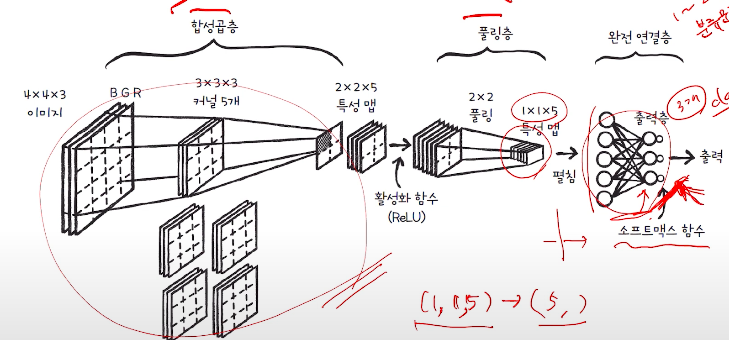

풀링층에서 나온 1x1x5 특성맵을 1차원 배열 형태로 펼침

출력층이 완전연결신경망이기 때문에 소프트맥스 함수를 사용해 3개의 클래스 각각 확률을 구해줌

## 합성곱 신경망 만들고 훈련하기
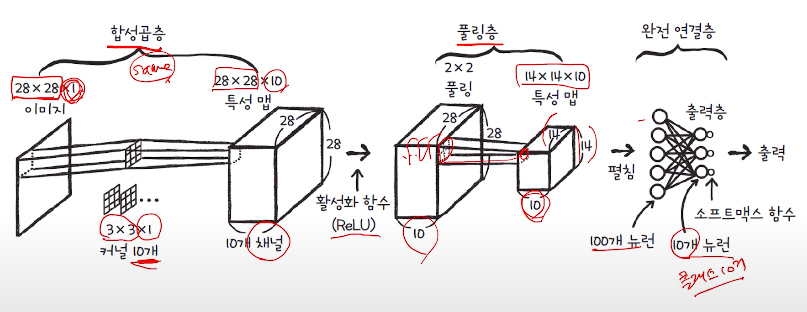

합성곱층에 커널 10개가 있는데 커널마다 절편이 존재함 풀링층은 절편 x

In [6]:
import numpy as np
def relu(x):
  return np.maximum(x,0)

In [7]:

from scipy.signal import convolve
from scipy.signal import correlate
from scipy.signal import convolve2d
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
        r_out = tf.nn.relu(c_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
        f_out = tf.reshape(p_out, [x.shape[0], -1])
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다 matmul=점곱함수
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z) #logit 대상 손실 계산해주는 함수
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [8]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = x ** 3 + 2 * x + 5

# 그래디언트를 계산합니다
print(tape.gradient(y, x))

tf.Tensor([ 5. 14. 29.], shape=(3,), dtype=float64)


In [9]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    y = tf.nn.softmax(x)

# 그래디언트를 계산합니다.
print(tape.gradient(y, x))

tf.Tensor([1.99908031e-17 5.43406367e-17 1.47713165e-16], shape=(3,), dtype=float64)


In [10]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [12]:

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [13]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [15]:
x_train.shape

(48000, 28, 28, 1)

In [16]:
x_train = x_train / 255
x_val = x_val / 255

In [17]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

In [18]:
import matplotlib.pyplot as plt

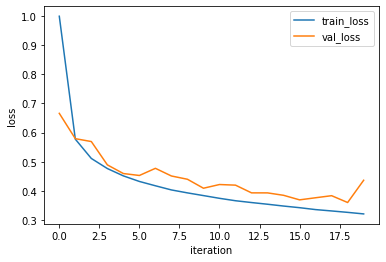

In [19]:
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [20]:
cn.score(x_val, y_val_encoded)

0.8431666666666666

## 케라스로 합성곱 신경망 모델 만들기


In [21]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:

conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv1.add(MaxPooling2D((2, 2)))
conv1.add(Flatten())
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [23]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [24]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.5928 - accuracy: 0.7919 - val_loss: 0.3306 - val_accuracy: 0.8836
Epoch 2/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3127 - accuracy: 0.8881 - val_loss: 0.2832 - val_accuracy: 0.8972
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2561 - accuracy: 0.9061 - val_loss: 0.2684 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2312 - accuracy: 0.9148 - val_loss: 0.2662 - val_accuracy: 0.9050
Epoch 5/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.2072 - accuracy: 0.9248 - val_loss: 0.2634 - val_accuracy: 0.9043
Epoch 6/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1782 - accuracy: 0.9338 - val_loss: 0.2472 - val_accuracy: 0.9126
Epoch 7/20
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1655 - accuracy: 0.9380 - val_loss: 0.2553 -

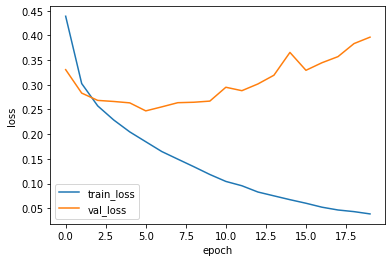

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

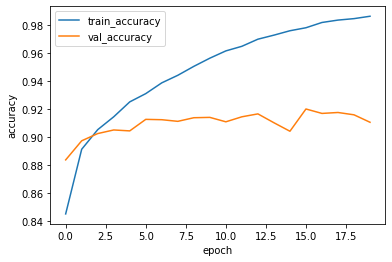

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [28]:
loss, accuracy = conv1.evaluate(x_val, y_val_encoded, verbose=0)

In [29]:
print(accuracy)

0.9104999899864197


In [30]:
from tensorflow.keras.layers import Dropout

In [31]:
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [32]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [33]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 24s 16ms/step - loss: 0.6884 - accuracy: 0.7500 - val_loss: 0.4018 - val_accuracy: 0.8485
Epoch 2/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3975 - accuracy: 0.8550 - val_loss: 0.3324 - val_accuracy: 0.8785
Epoch 3/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.3461 - accuracy: 0.8746 - val_loss: 0.2849 - val_accuracy: 0.8958
Epoch 4/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.3095 - accuracy: 0.8851 - val_loss: 0.2839 - val_accuracy: 0.8982
Epoch 5/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.2878 - accuracy: 0.8935 - val_loss: 0.2650 - val_accuracy: 0.9004
Epoch 6/20
1500/1500 [==============================] - 35s 23ms/step - loss: 0.2691 - accuracy: 0.9002 - val_loss: 0.2565 - val_accuracy: 0.9048
Epoch 7/20
1500/1500 [==============================] - 36s 24ms/step - loss: 0.2554 - accuracy: 0.9032 - val_loss: 0.2417 -

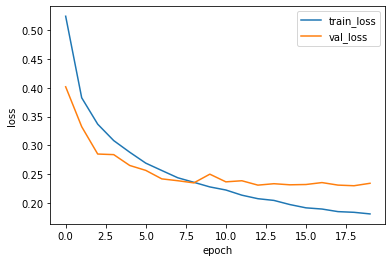

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

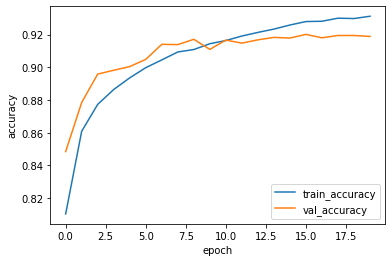

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [37]:
loss, accuracy = conv2.evaluate(x_val, y_val_encoded, verbose=0)

In [38]:
print(accuracy)

0.918833315372467
